In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters() #It registers pandas formaters and converters with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
df =  pd.read_csv('Datasets/forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
df.rename(columns={'wind':'Wind'}, inplace=True)
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,Wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [4]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
Wind     0
rain     0
area     0
dtype: int64

In [5]:
df['Wind'] = df['Wind'].replace(np.nan, 0)
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
Wind     0
rain     0
area     0
dtype: int64

In [6]:
df.Wind.first_valid_index()

0

In [7]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,Wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [8]:
from sklearn.linear_model import LinearRegression 

In [9]:
X = df['month']
Y = df['FFMC']

<AxesSubplot:xlabel='month', ylabel='FFMC'>

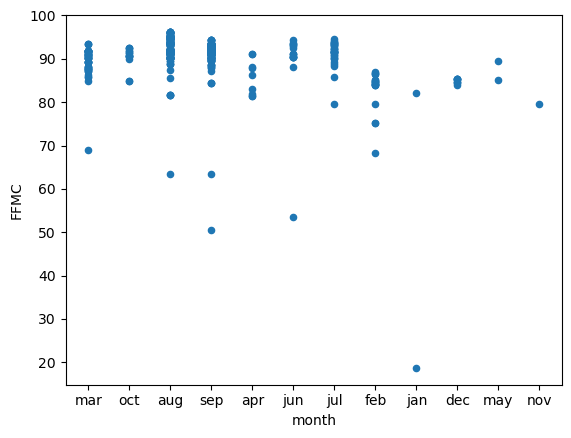

In [10]:
df.plot(kind= 'scatter', x='month' , y='FFMC')

<AxesSubplot:xlabel='month', ylabel='FFMC'>

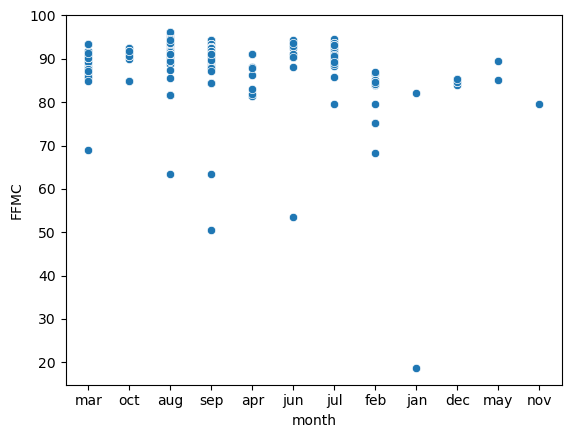

In [11]:
sns.scatterplot( x=df['month'] , y=df['FFMC'])

In [12]:
lm = LinearRegression(fit_intercept=False)

In [18]:
X = df['X']
Y = df['RH']

In [19]:
lm.fit(X,Y)

ValueError: Expected 2D array, got 1D array instead:
array=[7 7 7 8 8 8 8 8 8 7 7 7 6 6 6 6 5 8 6 6 6 5 7 7 7 7 7 7 6 6 6 6 6 6 6 6 6
 7 7 4 4 4 4 4 4 5 5 6 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 4 4 4 5 5
 5 9 9 1 1 1 1 1 1 1 1 1 1 1 1 6 6 8 8 8 8 4 3 3 3 3 3 3 2 2 2 4 4 4 4 4 4
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 4 4 4 4 3 3 3 3 9 1 2 1 8 1 2 6 5 8
 2 8 6 9 3 5 1 7 2 2 2 7 7 6 6 8 8 6 6 6 6 8 5 8 7 4 1 1 6 2 2 8 1 8 5 7 8
 2 8 1 6 7 6 2 2 4 2 2 6 4 3 2 1 6 7 8 5 4 2 7 6 8 4 7 7 7 4 4 4 1 4 6 8 3
 4 2 7 4 7 8 4 8 4 1 6 9 4 8 2 1 6 7 6 4 2 7 2 3 5 2 8 3 8 8 6 7 6 2 8 4 3
 7 2 3 2 6 4 4 6 2 3 4 2 8 2 4 8 4 4 3 4 4 4 6 6 3 5 2 7 7 7 7 2 9 4 7 8 7
 6 8 8 6 6 6 3 3 6 1 7 3 2 2 7 6 2 6 4 3 4 4 6 5 6 1 6 3 6 1 5 6 6 4 3 7 4
 1 2 4 7 6 8 2 2 8 6 8 6 2 1 5 3 5 5 4 7 7 7 4 4 6 6 1 6 4 7 4 6 6 4 4 6 4
 7 3 4 5 6 6 8 2 6 4 5 8 8 9 8 2 3 5 6 7 7 8 1 2 6 4 4 5 1 9 9 3 9 8 2 2 6
 4 4 1 6 7 9 7 5 8 6 6 2 2 8 2 8 1 8 2 8 2 1 3 7 1 8 2 1 2 8 8 2 1 5 8 6 1
 2 5 6 3 7 7 4 1 7 4 3 3 2 1 8 7 2 8 1 6 6 2 6 3 6 6 5 4 8 9 4 2 4 4 7 7 9
 4 3 8 2 2 5 5 4 4 4 4 1 1 6 6 4 3 6 7 8 7 4 2 4 1 1 2 1 5 6 8 4 2 7 1 6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
lm.coef_
lm.predict([[8]])
df